<a href="https://colab.research.google.com/github/ggomez31/ML-Assignments/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import io
uploaded = files.upload()

In [ ]:
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

Checking for null/missing values. There are none.

In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    799 non-null    int64  
 1   fixed acidity         799 non-null    float64
 2   volatile acidity      799 non-null    float64
 3   citric acid           799 non-null    float64
 4   residual sugar        799 non-null    float64
 5   chlorides             799 non-null    float64
 6   free sulfur dioxide   799 non-null    float64
 7   total sulfur dioxide  799 non-null    float64
 8   density               799 non-null    float64
 9   pH                    799 non-null    float64
 10  sulphates             799 non-null    float64
 11  alcohol               799 non-null    float64
 12  quality               799 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 81.3 KB


Checking for class imbalance in our target feature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


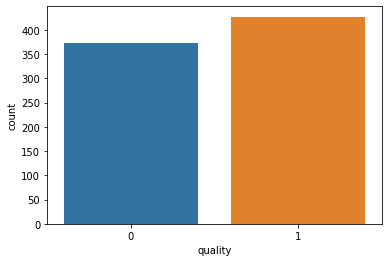

In [ ]:
sns.countplot(trainData.quality)

In [ ]:
trainData.describe()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,399.000000,8.404255,0.532972,0.275207,2.543930,0.087874,15.732791,46.568836,0.996901,3.310300,0.663692,10.371652,0.534418
std,230.795725,1.820637,0.180163,0.199743,1.380552,0.046212,10.102371,32.453258,0.001891,0.158626,0.178889,1.038703,0.499126
min,0.000000,4.600000,0.160000,0.000000,1.200000,0.012000,1.000000,6.000000,0.990640,2.740000,0.370000,8.400000,0.000000
25%,199.500000,7.100000,0.395000,0.090000,1.900000,0.071000,7.000000,22.000000,0.995725,3.210000,0.550000,9.500000,0.000000
50%,399.000000,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,37.000000,0.996820,3.310000,0.620000,10.100000,1.000000
75%,598.500000,9.300000,0.640000,0.440000,2.600000,0.091000,21.000000,65.000000,0.998000,3.400000,0.735000,11.000000,1.000000
max,798.000000,15.600000,1.580000,1.000000,15.500000,0.610000,55.000000,278.000000,1.003690,4.010000,2.000000,14.000000,1.000000


Drop id and target feature column, and assign to 'X'. Assign target feature column to 'y'.

In [ ]:
X = trainData.drop(trainData.columns[[0,12]], axis=1)
y = trainData.quality

Checking for variance. I see that "fixed acidity", "residual sugar", "free sulfur dioxide", and "total sulfur dioxide" have high variance.

In [ ]:
X.var()

fixed acidity              3.314719
volatile acidity           0.032459
citric acid                0.039897
residual sugar             1.905925
chlorides                  0.002136
free sulfur dioxide      102.057896
total sulfur dioxide    1053.213927
density                    0.000004
pH                         0.025162
sulphates                  0.032001
alcohol                    1.078903
dtype: float64

Computing the IQR and upper and lower thresholds to check for any outliers present in my data. I decided not to deal with handling outliers.

In [ ]:
def getOutliers(trainData):  
    Q1 = trainData.quantile(0.25)
    Q3 = trainData.quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    res = ((trainData < lower) | (trainData > upper))
    for i in range(res.shape[1]):
        print(res.iloc[:,i].value_counts())

In [ ]:
getOutliers(X)

False    775
True      24
Name: fixed acidity, dtype: int64
False    790
True       9
Name: volatile acidity, dtype: int64
False    798
True       1
Name: citric acid, dtype: int64
False    720
True      79
Name: residual sugar, dtype: int64
False    742
True      57
Name: chlorides, dtype: int64
False    787
True      12
Name: free sulfur dioxide, dtype: int64
False    778
True      21
Name: total sulfur dioxide, dtype: int64
False    784
True      15
Name: density, dtype: int64
False    780
True      19
Name: pH, dtype: int64
False    769
True      30
Name: sulphates, dtype: int64
False    793
True       6
Name: alcohol, dtype: int64


Defining a function that will perform normalization to each instance of a dataset to reduce the variance since normalization is centered around scaling your data down while standardization focuses on having your data centered around a mean of 0 and std of 1. KNN is sensitive to the variance of data so normalization will help solve this issue.

In [ ]:
def normalizeData(data):
  cols = ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']
  X_subset = normalize(data.loc[:,cols], axis = 0)
  data.values[:, 0] = X_subset[:, 0]
  data.values[:, 3] = X_subset[:, 1]
  data.values[:, 5] = X_subset[:, 2]
  data.values[:, 6] = X_subset[:, 3]
  #data.values[:, 10] = X_subset[:, 4]
  return data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)

In [ ]:
X_train = normalizeData(X_train)
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,0.036437,0.533018,0.274729,0.033080,0.087818,0.031499,0.030649,0.996872,3.311419,0.661154,10.382313
std,0.007954,0.182444,0.199886,0.017233,0.046808,0.019980,0.021262,0.001870,0.160259,0.173967,1.050320
min,0.019957,0.160000,0.000000,0.015772,0.012000,0.001990,0.003935,0.990640,2.740000,0.370000,8.400000
25%,0.030804,0.400000,0.090000,0.024973,0.071000,0.014921,0.015085,0.995720,3.210000,0.550000,9.500000
50%,0.034275,0.520000,0.260000,0.028916,0.080000,0.027853,0.024924,0.996800,3.310000,0.620000,10.100000
75%,0.040349,0.640000,0.440000,0.034174,0.091000,0.041780,0.042632,0.997900,3.400000,0.730000,11.000000
max,0.067682,1.580000,1.000000,0.203727,0.610000,0.109424,0.182335,1.003690,4.010000,2.000000,14.000000


In [ ]:
X_test = normalizeData(X_test)
X_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.109607,0.532562,0.279500,0.092771,0.088375,0.091024,0.090500,0.997164,3.300250,0.686500,10.275833
std,0.022192,0.159227,0.199651,0.062792,0.040716,0.065330,0.066063,0.002065,0.143641,0.218186,0.928256
min,0.072574,0.250000,0.000000,0.049910,0.038000,0.018404,0.016044,0.992560,2.930000,0.390000,9.000000
25%,0.093310,0.390000,0.097500,0.063220,0.070000,0.036808,0.036100,0.995940,3.197500,0.560000,9.500000
50%,0.101086,0.530000,0.280000,0.076529,0.077500,0.073617,0.070194,0.997030,3.290000,0.620000,10.000000
75%,0.123117,0.651250,0.440000,0.093166,0.095250,0.116560,0.128355,0.998305,3.380000,0.780000,10.925000
max,0.171068,1.020000,0.680000,0.512413,0.358000,0.337411,0.302837,1.003690,3.710000,1.950000,12.900000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
params = {'n_neighbors':[25, 50, 75],
          'p': [2],
          'weights':['distance'],
          }
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid=params,
                        cv=10,
                        n_jobs=-1)
grid_knn.fit(X_train, y_train)

print(grid_knn.best_estimator_)
print(grid_knn.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='distance')
0.8024647887323944


Evaluating the model's performance on the training data that was used to fit the model. Output should all be 1.0.

In [ ]:
y_pred = grid_knn.predict(X_train)
y_pred_proba_knn = grid_knn.predict_proba(X_train)[:,1]

grid_knn_roc = roc_auc_score(y_train, y_pred_proba_knn)
knn_acc_score = accuracy_score(y_train, y_pred)
knn_f1 = f1_score(y_train, y_pred)

print("KNN ROC AOC Score: {:.10f}".format(grid_knn_roc))
print("KNN Accuracy Score: {:.10f}".format(knn_acc_score))
print("KNN F1 score: {:.10f}".format(knn_f1))

KNN ROC AOC Score: 1.0000000000
KNN Accuracy Score: 1.0000000000
KNN F1 score: 1.0000000000


Evaluating the model's performance on the test split. 

In [ ]:
y_pred = grid_knn.predict(X_test)
y_pred_proba_knn = grid_knn.predict_proba(X_test)[:,1]

grid_knn_roc = roc_auc_score(y_test, y_pred_proba_knn)
knn_acc_score = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print("KNN ROC AOC Score: {:.10f}".format(grid_knn_roc))
print("KNN Accuracy Score: {:.10f}".format(knn_acc_score))
print("KNN F1 score: {:.10f}".format(knn_f1))

KNN ROC AOC Score: 0.6929824561
KNN Accuracy Score: 0.6250000000
KNN F1 score: 0.6341463415


In [ ]:
train_roc_auc = []
train_acc = []
train_f1 = []

test_roc_auc = []
test_acc = []
test_f1 = []

for i in range(200):
  X_train_loop, X_test_loop, y_train_loop, y_test_loop = train_test_split(trainData.drop(trainData.columns[[0,12]], axis=1), trainData.quality, stratify=trainData.quality, test_size=0.1)
  X_train_loop = normalizeData(X_train_loop)
  X_test_loop = normalizeData(X_test_loop)

  GNB = KNeighborsClassifier(n_neighbors=25, p=2, weights='distance')
  GNB.fit(X_train_loop, y_train_loop)

  y_pred = GNB.predict(X_train_loop)
  y_pred_proba = GNB.predict_proba(X_train_loop)[:,1]

  train_roc_auc.append(roc_auc_score(y_train_loop, y_pred_proba))
  train_acc.append(accuracy_score(y_train_loop, y_pred))
  train_f1.append(f1_score(y_train_loop, y_pred))

  y_pred = GNB.predict(X_test_loop)
  y_pred_proba = GNB.predict_proba(X_test_loop)[:,1]

  test_roc_auc.append(roc_auc_score(y_test_loop, y_pred_proba))
  test_acc.append(accuracy_score(y_test_loop, y_pred))
  test_f1.append(f1_score(y_test_loop, y_pred))

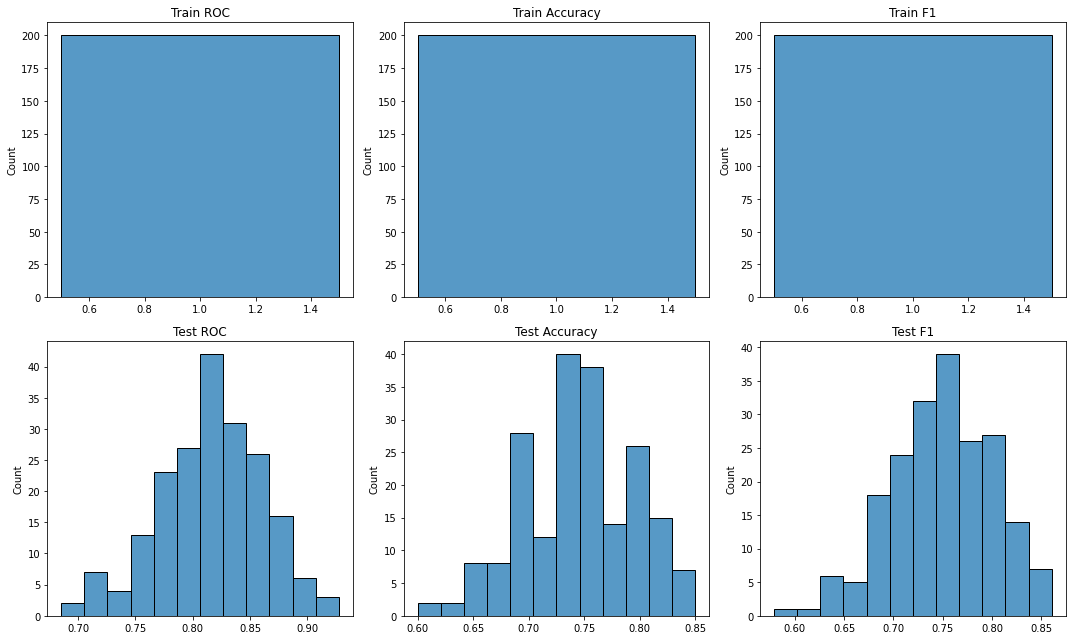

In [ ]:
f, axs = plt.subplots(2, 3, figsize=(15,9))
axs[0,0].set_title("Train ROC")
axs[0,1].set_title("Train Accuracy")
axs[0,2].set_title("Train F1")
axs[1,0].set_title("Test ROC")
axs[1,1].set_title("Test Accuracy")
axs[1,2].set_title("Test F1")
sns.histplot(train_roc_auc, ax=axs[0,0]);
sns.histplot(train_acc, ax=axs[0,1]);
sns.histplot(train_f1, ax=axs[0,2]);
sns.histplot(test_roc_auc, ax=axs[1,0]);
sns.histplot(test_acc, ax=axs[1,1]);
sns.histplot(test_f1, ax=axs[1,2]);
f.tight_layout()

In [ ]:
X_real_test = testData.drop(testData.columns[[0]], axis=1)
X_real_test.var()

fixed acidity              2.737951
volatile acidity           0.031654
citric acid                0.036012
residual sugar             2.072202
chlorides                  0.002297
free sulfur dioxide      116.859227
total sulfur dioxide    1112.288576
density                    0.000004
pH                         0.022538
sulphates                  0.025443
alcohol                    1.188475
dtype: float64

Just like we did with the train/test split, we must transform the test data with normalization.

In [ ]:
X_real_test = normalizeData(X_real_test)
X_real_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.034663,0.522675,0.266750,0.030745,0.087060,0.029311,0.028708,0.996592,3.311925,0.652612,10.474250
std,0.006965,0.177914,0.189768,0.017468,0.047928,0.019783,0.020649,0.001872,0.150128,0.159507,1.090172
min,0.020625,0.120000,0.000000,0.010921,0.012000,0.001830,0.003715,0.990070,2.870000,0.330000,8.400000
25%,0.029885,0.390000,0.100000,0.023056,0.070000,0.012810,0.013621,0.995500,3.210000,0.550000,9.500000
50%,0.033253,0.520000,0.250000,0.026696,0.079000,0.023790,0.023528,0.996600,3.310000,0.620000,10.300000
75%,0.038304,0.630000,0.410000,0.031550,0.090000,0.040260,0.037149,0.997740,3.400000,0.722500,11.200000
max,0.066926,1.330000,0.790000,0.167456,0.611000,0.131761,0.178934,1.003150,4.010000,1.950000,14.900000


Printing out the results of our predictions for the real test data. Output should be identical to my most recent submission on kaggle.

In [ ]:
y_pred_real_test = grid_knn.predict(X_real_test)
y_pred_real_test

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,

Convert to a dataframe and convert to a csv.

In [ ]:
df = pd.DataFrame({'id': testData.id, 'quality':y_pred_real_test.tolist()})
df.to_csv('assignment2.csv', index=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df